In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Machine-learning-part-1-main/heart.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
print ('Data shape', dataset.shape)

Data shape (303, 14)


In [ ]:
dataset.isnull().sum()
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
X=dataset.iloc[:,0:13].values
x=dataset.iloc[:,0:13]
Y=dataset.iloc[:,13].values
y=dataset.iloc[:,13:14]
print("X shape",x.shape)
print("Y shape", y.shape)

X shape (303, 13)
Y shape (303, 1)


In [ ]:
print("Attributes\n")
for col in x.columns:
  print(col)

print("Class\n")
for col in y.columns:
  print(col)

Attributes

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
Class

target


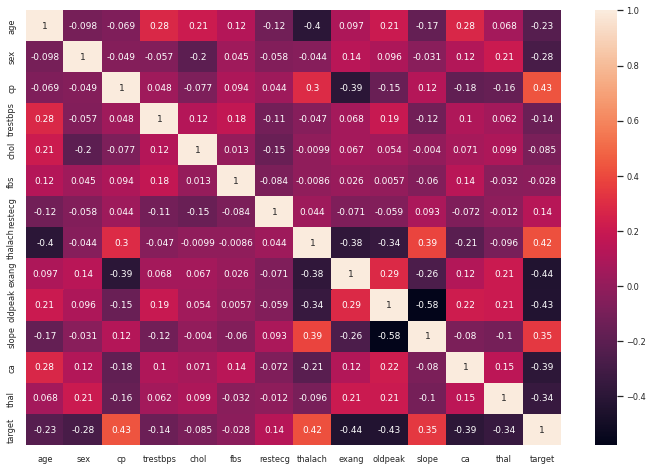

In [ ]:
import seaborn as sn
sn.set(font_scale=0.75)
fig_dimension= (12,8)
fig,ax=plt.subplots(figsize=fig_dimension)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.20, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_prediction_knn=classifier_knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM_knn=confusion_matrix(Y_test, y_prediction_knn)
print(CM_knn)

[[21  6]
 [ 5 29]]


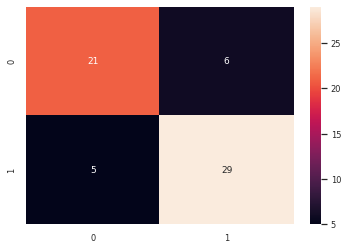

In [ ]:
sn.heatmap(CM_knn, annot= True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_knn)
pre = precision_score(Y_test, y_prediction_knn)
re  = recall_score(Y_test, y_prediction_knn)
f1  = f1_score(Y_test, y_prediction_knn)

In [ ]:
print("KNN overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

KNN overview
Accuracy = 0.819672131147541
Precison = 0.8285714285714286
Recall = 0.8529411764705882
f1 score = 0.8405797101449276


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
probability_knn = classifier_knn.predict_proba(X_test)
probpos_knn=probability_knn[:,1]

In [ ]:
auc_knn = roc_auc_score(Y_test, probpos_knn)
print('K-NN: ROC AUC=%.3f' % (auc_knn))

K-NN: ROC AUC=0.917


In [ ]:
fpr_knn, tpr_knn, _ = roc_curve(Y_test, probpos_knn)

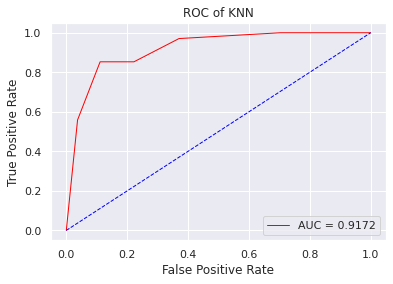

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_knn, tpr_knn,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_knn)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [ ]:
classifier_svm.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_prediction_svm=classifier_svm.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM_svm=confusion_matrix(Y_test, y_prediction_svm)
print(CM_svm)

[[21  6]
 [ 2 32]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_svm)
pre = precision_score(Y_test, y_prediction_svm)
re  = recall_score(Y_test, y_prediction_svm)
f1  = f1_score(Y_test, y_prediction_svm)

In [ ]:
print("SVM overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

SVM overview
Accuracy = 0.8688524590163934
Precison = 0.8421052631578947
Recall = 0.9411764705882353
f1 score = 0.8888888888888888


In [ ]:
probability_svm = classifier_svm.predict_proba(X_test)
probpos_svm=probability_svm[:,1]

In [ ]:
auc_svm = roc_auc_score(Y_test, probpos_svm)
print('SVM: ROC AUC=%.3f' % (auc_svm))

SVM: ROC AUC=0.929


In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(Y_test, probpos_svm)

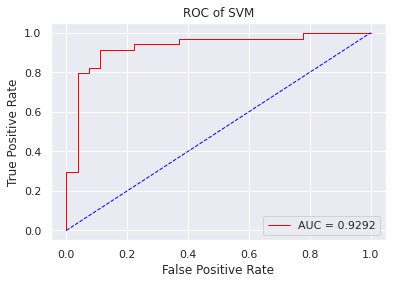

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_svm, tpr_svm,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_svm)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_prediction_dt=classifier_dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test, y_prediction_dt)
print(cm_dt)

[[22  5]
 [ 8 26]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_dt)
pre = precision_score(Y_test, y_prediction_dt)
re  = recall_score(Y_test, y_prediction_dt)
f1  = f1_score(Y_test, y_prediction_dt)

In [ ]:
print("DT overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

DT overview
Accuracy = 0.7868852459016393
Precison = 0.8387096774193549
Recall = 0.7647058823529411
f1 score = 0.7999999999999999


In [ ]:
probability_dt = classifier_dt.predict_proba(X_test)
probpos_dt=probability_dt[:,1]

In [ ]:
auc_dt = roc_auc_score(Y_test, probpos_dt)
print('DT: ROC AUC=%.3f' % (auc_dt))

DT: ROC AUC=0.790


In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(Y_test, probpos_dt)

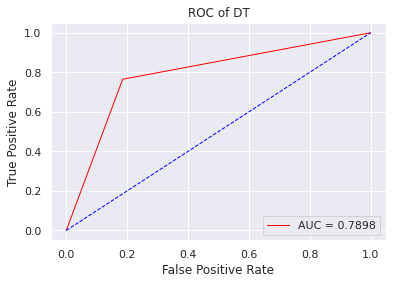

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_dt, tpr_dt,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of DT")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(dual=False,penalty="l2",random_state=0)

In [ ]:
classifier_lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_prediction_lr=classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test, y_prediction_lr)
print(cm_lr)

[[21  6]
 [ 3 31]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_lr)
pre = precision_score(Y_test, y_prediction_lr)
re  = recall_score(Y_test, y_prediction_lr)
f1  = f1_score(Y_test, y_prediction_lr)

In [ ]:
print("LR overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

LR overview
Accuracy = 0.8524590163934426
Precison = 0.8378378378378378
Recall = 0.9117647058823529
f1 score = 0.8732394366197184


In [ ]:
probability_lr = classifier_lr.predict_proba(X_test)
probpos_lr=probability_lr[:,1]

In [ ]:
auc_lr = roc_auc_score(Y_test, probpos_lr)
print('LR: ROC AUC=%.3f' % (auc_lr))

LR: ROC AUC=0.911


In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, probpos_lr)

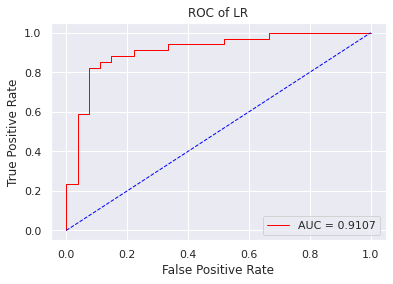

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_lr, tpr_lr,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_lr)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of LR")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(priors=None)

In [ ]:
classifier_GaussianNB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_prediction_GaussianNB=classifier_GaussianNB.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(Y_test, y_prediction_GaussianNB)
print(cm_GaussianNB)

[[21  6]
 [ 3 31]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_GaussianNB)
pre = precision_score(Y_test, y_prediction_GaussianNB)
re  = recall_score(Y_test, y_prediction_GaussianNB)
f1  = f1_score(Y_test, y_prediction_GaussianNB)

In [ ]:
print("GNB overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

GNB overview
Accuracy = 0.8524590163934426
Precison = 0.8378378378378378
Recall = 0.9117647058823529
f1 score = 0.8732394366197184


In [ ]:
probability_GaussianNB = classifier_GaussianNB.predict_proba(X_test)
probpos_GaussianNB=probability_GaussianNB[:,1]

In [ ]:
auc_GaussianNB = roc_auc_score(Y_test, probpos_GaussianNB)
print('GaussianNB: ROC AUC=%.3f' % (auc_GaussianNB))

GaussianNB: ROC AUC=0.907


In [ ]:
fpr_GaussianNB, tpr_GaussianNB, _ = roc_curve(Y_test, probpos_GaussianNB)

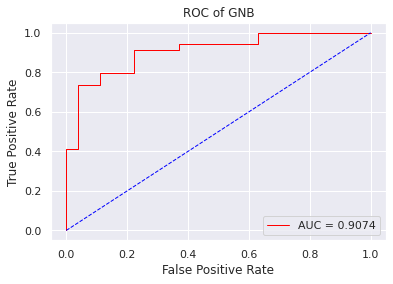

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_GaussianNB, tpr_GaussianNB,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_GaussianNB)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of GNB")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion="gini",min_samples_leaf=1,random_state=0)

In [ ]:
classifier_rf.fit (X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_prediction_rf=classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test, y_prediction_rf)
print(cm_rf)

[[24  3]
 [ 5 29]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(Y_test, y_prediction_rf)
pre = precision_score(Y_test, y_prediction_rf)
re  = recall_score(Y_test, y_prediction_rf)
f1  = f1_score(Y_test, y_prediction_rf)

In [ ]:
print("RF overview")
print("Accuracy =", ac)
print("Precison =",pre)
print("Recall =", re)
print("f1 score =", f1)

RF overview
Accuracy = 0.8688524590163934
Precison = 0.90625
Recall = 0.8529411764705882
f1 score = 0.8787878787878787


In [ ]:
probability_rf = classifier_rf.predict_proba(X_test)
probpos_rf=probability_rf[:,1]

In [ ]:
auc_rf = roc_auc_score(Y_test, probpos_rf)
print('RF: ROC AUC=%.3f' % (auc_rf))

RF: ROC AUC=0.937


In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(Y_test, probpos_rf)

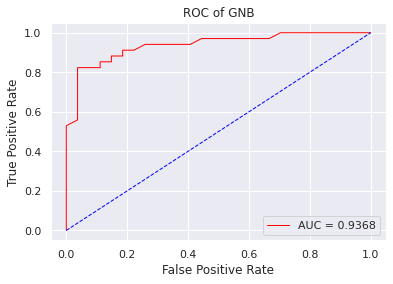

In [ ]:
sn.set(font_scale=1)
plt.plot(fpr_rf, tpr_rf,linewidth=1,color='red', label = 'AUC = %0.4f' % auc_rf)
plt.plot([0, 1], [0, 1], color='blue', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of GNB")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()